In [82]:
from PIL import Image
import numpy as np
import glob
import pandas as pd

In [83]:
# ディレクトリのパスを指定
directory_path = '../data'

# 指定されたディレクトリ内のすべてのファイルリストを取得
image_urls = glob.glob(f'{directory_path}/*.jpg')

# ファイルリストを表示
print(image_urls)

['../data/sample6.jpg', '../data/sample2.jpg', '../data/sample4.jpg', '../data/sample7.jpg', '../data/sample3.jpg', '../data/sample5.jpg', '../data/sample1.jpg']


In [84]:
# トリミング関数（トリミングする周辺領域パーセント指定）
def crop_center(pil_img, crop_area):
    img_width, img_height = pil_img.size
    crop_width = int(img_width * (1-crop_area))
    crop_height = int(img_height * (1-crop_area))
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

# 特定値より濃い値を算出
def calc_darkarea(image_url,threshold,crop_area):
    # 画像を読み込み、グレースケールに変換
    image = Image.open(image_url).convert('L')

    # 画像を切り抜き
    croped_image = crop_center(image,crop_area)

    # 画像をnumpy配列に変換
    image_array = np.array(croped_image)
    
    # しきい値を設定
    threshold = threshold

    # しきい値よりも濃い（暗い）ピクセルの数をカウント
    dark_pixels = np.sum(image_array <= threshold)

    # 全体のピクセル数を取得
    total_pixels = image_array.size

    # 濃いピクセルの割合を計算
    dark_pixel_ratio = dark_pixels / total_pixels

    return (image_url.split('/')[-1].split('.')[0],dark_pixel_ratio)


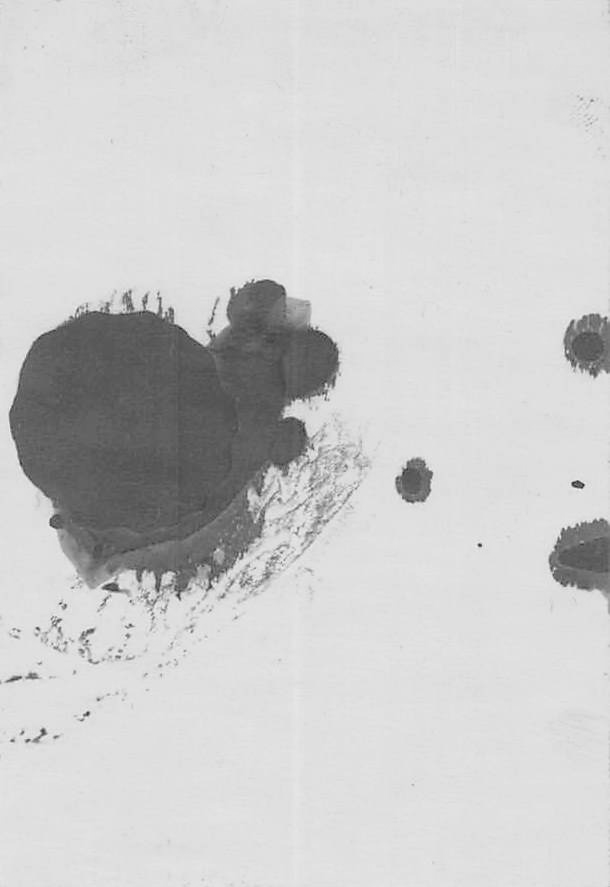

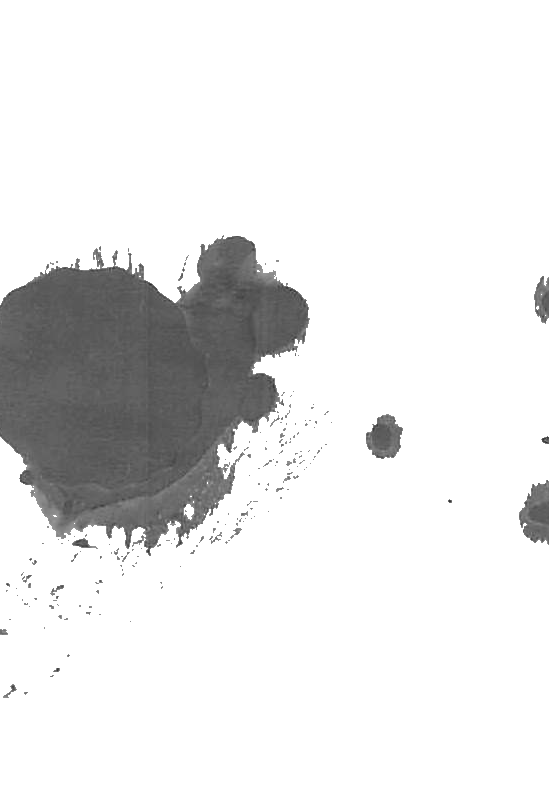

In [85]:
# トリミング状況の確認（適切なcrop_areaとthresholdを設定）

# トリミングする周辺領域を100分率で指定 
crop_area = 0.1
# しきい値の設定
threshold =150
image = Image.open(image_urls[0]).convert('L')
# 画像をnumpy配列に変換
image_array = np.array(image)
# 新しい画像を作成し、しきい値以下のピクセルのみを残し、他は255（白）に設定
threshold_image_array = np.where(image_array <= threshold, image_array, 255)
# numpy配列を画像に戻す
threshold_image = Image.fromarray(threshold_image_array)

image.show()
crop_center(threshold_image, crop_area)

In [86]:
df = pd.DataFrame(columns=['filename','value'])
threshold = 150
crop_area = 0.05

for index, image_url in enumerate(image_urls):
    filename,value = calc_darkarea(image_urls[index],threshold,crop_area)
    df.loc[len(df)] = {'filename':filename,'value':value}

df

,filename,value
0,sample6,0.150671
1,sample2,0.346668
2,sample4,0.002204
3,sample7,0.184592
4,sample3,0.006408
5,sample5,0.113133
6,sample1,0.000000


In [87]:
df.to_csv('../data/calc_result.csv')